In [4]:
import math
import numpy as np
import UsefulFunctions as uf
import matplotlib
import json
from matplotlib import pyplot as plt
from matplotlib import cm, colors

plt.rcParams.update({'font.size': 16})


In [5]:

grays = ['dimgray', 'silver', 'gainsboro']
eq_labels = ['Tintina','RSZ','MSZ','FSZ','SSZ','NF']
for i in range(1, 6):
    eq_labels.append(f'Denali_{i}')
for i in range(1, 3):
    eq_labels.append(f'CM_{i}')

with open('Data/Interior Crustal/Interior Community Data.json') as json_file:
    comm_dict = json.load(json_file)
print(len(comm_dict.keys()))
eq_dict = {'tin': uf.Earthquake('Data/Interior Crustal/grids/Tintina.xml'),
           'rsz': uf.Earthquake('Data/Interior Crustal/grids/Rampart.xml'),
           'msz': uf.Earthquake('Data/Interior Crustal/grids/Minto_Flats.xml'),
           'fsz': uf.Earthquake('Data/Interior Crustal/grids/Fairbanks.xml'),
           'ssz': uf.Earthquake('Data/Interior Crustal/grids/Salcha.xml'),
           'nf': uf.Earthquake('Data/Interior Crustal/grids/Northern_Foothills.xml'),
           'den1': uf.Earthquake('Data/Interior Crustal/grids/Denali_1.xml'),
           'den2': uf.Earthquake('Data/Interior Crustal/grids/Denali_2.xml'),
           'den3': uf.Earthquake('Data/Interior Crustal/grids/Denali_3.xml'),
           'den4': uf.Earthquake('Data/Interior Crustal/grids/Denali_4.xml'),
           'den5': uf.Earthquake('Data/Interior Crustal/grids/Denali_5.xml'),
           'cm2': uf.Earthquake('Data/Interior Crustal/grids/Castle_1.xml'),
           'cm1': uf.Earthquake('Data/Interior Crustal/grids/Castle_2.xml')}


12
Start of Parsing for Data/Interior Crustal/grids/Tintina.xml
   ~~Detection stats~~
    Used a maximum azimuthal gap of 300 degrees and minimum station vector angle of 30 km
    Number of stations needed: 4
    Detection Time: 17.15196695883096
    Azimuthal Gap: 183.77250995822874
    Max Vector Angle: 156.34349853026384
    Maximum Epicentral Distance: 114.63938144588907
Finished parsing grid.xml for: M7.3, Tintina, at 2022-08-04T21:29:29 (ID:Tintina)
Start of Parsing for Data/Interior Crustal/grids/Rampart.xml
   ~~Detection stats~~
    Used a maximum azimuthal gap of 300 degrees and minimum station vector angle of 30 km
    Number of stations needed: 4
    Detection Time: 12.060376538164618
    Azimuthal Gap: 152.80983799695514
    Max Vector Angle: 147.90608676559566
    Maximum Epicentral Distance: 80.40753015643104
Finished parsing grid.xml for: M7.3, Rampart, at 2022-08-04T21:29:29 (ID:Rampart)
Start of Parsing for Data/Interior Crustal/grids/Minto_Flats.xml
   ~~Detection s

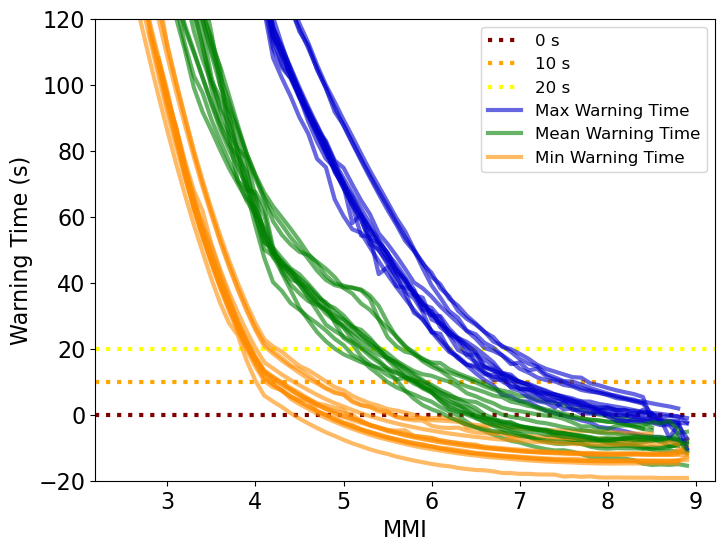

In [7]:

# my_cmap = cm.winter
# my_norm = colors.Normalize(vmin=1, vmax=13)

lw = 3
a = 0.6


fig, ax = plt.subplots(figsize=(8, 6))
warn_colors = ['maroon', 'orange', 'yellow']
wtax_dict = {}
for i in range(0, 3):
    wtax_dict[i] = ax.axhline(i * 10, lw=3, c=warn_colors[i], ls=':', zorder=0, label='%i s' % (i * 10))

ii = 0
for k, v in eq_dict.items():
    mmi = v.mmi
    wts = v.warning_times_s
    wtf = v.warning_times_slow
    wt_means = []
    wt_medians = []
    wt_maxs = []
    wt_mins = []
    mmi_vals = np.arange(mmi.min(), mmi.max() + 0.1, 0.1)
    for p in mmi_vals:
        mask = np.isclose(mmi, p, rtol=0.001, atol=0.001)
        if wts[mask].size == 0:
            wt_means.append(None)
            wt_medians.append(None)
            wt_maxs.append(None)
            wt_mins.append(None)
            continue
        else:
            wtt = np.vstack((wts[mask], wtf[mask]))
            wt_means.append(np.mean(wtt))
            wt_medians.append(np.median(wtt))
            wt_maxs.append(np.max(wtt))
            wt_mins.append(np.min(wtt))

    # x, y = uf.createPolygon(v.mmi, v.warning_times_s, xscale='lin')
    # ax.plot(x, y, c='dimgray', alpha=0.9)
    # ax.plot(mmi_vals, wt_means, lw=2, marker='^', markersize=3, c='g', label='Warning Time Means', alpha=0.9)
    if ii == 0:
        line1, = ax.plot(mmi_vals, wt_maxs, lw=lw, c='mediumblue', label='Max Warning Time', alpha=a)
        line2, = ax.plot(mmi_vals, wt_means, lw=lw, c='g', label='Mean Warning Time', alpha=a)
        line3, = ax.plot(mmi_vals, wt_mins, lw=lw, c='darkorange', label='Min Warning Time', alpha=a)
        
    else:
        ax.plot(mmi_vals, wt_maxs, lw=lw, c='mediumblue', alpha=a)
        ax.plot(mmi_vals, wt_means, lw=lw, c='g', alpha=a)
        ax.plot(mmi_vals, wt_mins, lw=lw, c='darkorange', alpha=a)
    ii += 0

ax.set_ylabel('Warning Time (s)')
ax.set_xlabel('MMI')
ax.legend(loc='upper right', fontsize=12, handles=[wtax_dict[0], wtax_dict[1], wtax_dict[2], line1, line2, line3])
# plt.title('Interior Scenarios WT vs MMI')
plt.ylim(-20, 120)

plt.savefig('Figures/Interior Crustal/pickles ranges.png', dpi=700)
plt.savefig('Figures/Interior Crustal/pickles ranges.pdf', dpi=700)
plt.show()


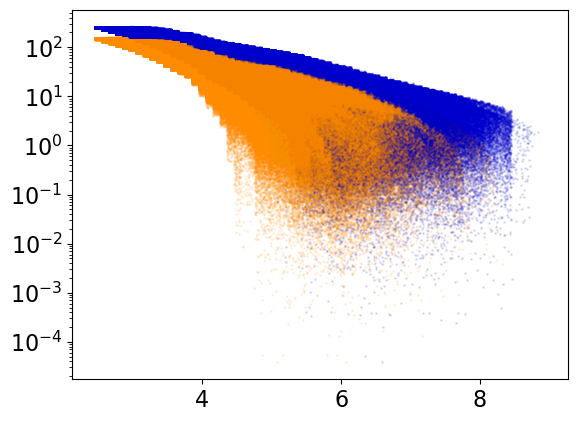

In [9]:
a = 0.1
s = 1
# noise = np.random.uniform(0,1,len())

plt.figure()
for k, v in eq_dict.items():
    noise = np.random.uniform(0,1,len(v.mmi)) * 0.1 - 0.05
    noise = noise.reshape((len(noise), 1))
    # plt.figure()
    plt.scatter(v.mmi + noise, v.warning_times_slow, c='mediumblue', alpha=a, s=s, label='Max Warning Times')
    plt.scatter(v.mmi + noise, v.warning_times_s, c='darkorange', alpha=a, s=s, label='Min Warning Times')
    # plt.show()
    # plt.figure()

plt.yscale('log')
plt.savefig('Figures/Interior Crustal/all points all scenarios ranges logy.png',dpi=700)
plt.show()
